# Análisis de datos de la OCDE
## ¿Qué es la OCDE?
Fundada en 1961, la Organización para la Cooperación y el Desarrollo Económicos (OCDE) agrupa a 36 países miembros y su misión es promover políticas que mejoren el bienestar económico y social de las personas alrededor del mundo.

La OCDE ofrece un foro donde los gobiernos puedan trabajar conjuntamente para compartir experiencias y buscar soluciones a los problemas comunes. Trabajamos para entender que es lo que conduce al cambio económico, social y ambiental. Medimos la productividad y los flujos globales del comercio e inversión. Analizamos y comparamos datos para realizar pronósticos de tendencias. Fijamos estándares internacionales dentro de un amplio rango de temas de políticas públicas.

## Preambulo
A continuación, se mostrarán datos de relevancia para el solicitante de la información, tales datos irán mostrando los resultados encontrados y al final se mostrarán conclusiones del mismo.

In [ ]:
# Análisis Inicial
Con base a la información dada por el solicitante, se inicia el proyecto.

In [5]:
# Descargar libreria
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Descargamos la base de datos
OCDE=pd.read_csv("BLI.csv")

# ¿Cuántos paises son los participantes en la lista?
len(OCDE["Country"].unique())-1

38

In [ ]:
# ¿Cuáles son los países que están en la base de datos?
OCDE["Country"].unique()
pd.DataFrame(OCDE["Country"].unique())


In [8]:
# ¿Cuántos tipos de unidades se manejan?
len(OCDE["Unit"].unique())

7

In [9]:
# ¿Cuáles son los tipos de unidades que se manejan?
OCDE["Unit"].unique()
pd.DataFrame(OCDE["Unit"].unique())

,0
0,Percentage
1,Average score
2,Ratio
3,US Dollar
4,Years
5,Micrograms per cubic metre
6,Hours


In [10]:
# ¿Cuáles son los indicadores medidos?
OCDE["Indicator"].unique()
pd.DataFrame(OCDE["Indicator"].unique())

,0
0,Labour market insecurity
1,Stakeholder engagement for developing regulations
2,Feeling safe walking alone at night
3,Dwellings without basic facilities
4,Housing expenditure
5,Rooms per person
6,Household net adjusted disposable income
7,Household net financial wealth
8,Employment rate
9,Long-term unemployment rate


In [11]:
# ¿Cuántos son?
len(OCDE["Indicator"].unique())

24

In [12]:
# Visualizo el encabezado para saber cuáles datos no son "tan reelevantes" y así poder borrar algunas columnas.
OCDE.head(10)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.3,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.8,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.8,NaN,NaN
5,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
6,FIN,Finland,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
7,FRA,France,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.0,NaN,NaN
8,DEU,Germany,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.0,NaN,NaN
9,GRC,Greece,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,17.4,NaN,NaN


In [13]:
#Descripción básica de los indicadores numéricos (estadística descriptiva)
OCDE.describe()

,PowerCode Code,Reference Period Code,Reference Period,Value
count,3398.0,0.0,0.0,3398.000000
mean,0.0,NaN,NaN,5353.200309
std,0.0,NaN,NaN,15832.099269
min,0.0,NaN,NaN,0.000000
25%,0.0,NaN,NaN,7.000000
50%,0.0,NaN,NaN,62.000000
75%,0.0,NaN,NaN,91.000000
max,0.0,NaN,NaN,176076.000000


In [14]:
#¿Podemos eliminar algunas columnas de nuestra base de datos sin perder información importante? 
# Presenta la tabla y explica por qué eliminste dichas columnas

 Eliminaré las columnas INDICATOR, MEASURE, INEQUALITY, Unit Code, PowerCode Code, Reference Period Code,Flag Codes.
 Quitaré las que son indicadores en código o abreviatura, ya que si la tabla se muestra a "simples mortales", es más fácil que puedan interpretar los datos de esta forma. 
 Dejaré el la última columna "Flags" ya que no sabemos si sea de utilidad para el ponente respecto a un indicador.

In [15]:
# se crea una tabla llamada "OCDE2" para tener tanto la tabla original que es OCDE, como la modificada (OCDE2)
OCDE2=OCDE.drop(["INDICATOR","MEASURE","INEQUALITY","Unit Code","PowerCode Code","Reference Period Code","Flag Codes"],axis=1)

In [16]:
# Visualizamos la tabla modificada
pd.DataFrame(OCDE2)

,LOCATION,Country,Indicator,Measure,Inequality,Unit,PowerCode,Reference Period,Value,Flags
0,AUS,Australia,Labour market insecurity,Value,Total,Percentage,Units,NaN,4.30,NaN
1,AUT,Austria,Labour market insecurity,Value,Total,Percentage,Units,NaN,2.70,NaN
2,BEL,Belgium,Labour market insecurity,Value,Total,Percentage,Units,NaN,4.80,NaN
3,CAN,Canada,Labour market insecurity,Value,Total,Percentage,Units,NaN,3.90,NaN
4,CZE,Czech Republic,Labour market insecurity,Value,Total,Percentage,Units,NaN,1.80,NaN
5,DNK,Denmark,Labour market insecurity,Value,Total,Percentage,Units,NaN,2.30,NaN
6,FIN,Finland,Labour market insecurity,Value,Total,Percentage,Units,NaN,2.70,NaN
7,FRA,France,Labour market insecurity,Value,Total,Percentage,Units,NaN,5.00,NaN
8,DEU,Germany,Labour market insecurity,Value,Total,Percentage,Units,NaN,2.00,NaN
9,GRC,Greece,Labour market insecurity,Value,Total,Percentage,Units,NaN,17.40,NaN


In [17]:
# ¿Puedes cambiar en nombre de las columnas a español?
# Primero creamos un nuevo dataset, me basaré en el anterior (ODCE2) como la base original a la que renombraré.
OCDEespanol=OCDE2

In [18]:
# La sintaxis es Dataset.rename(columns={'nombre_antiguo':'nombre_nuevo'})

OCDEespanol.rename(columns={"LOCATION":"Localidad","Country":"País","Indicator":"Indicador","Measure":"Medida","Inequality":"Desigualdad","Unit":"Unidad","PowerCode":"Código de poder","Reference Period":"Periodo de Referencia","Value":"Valor","Flags":"Banderas"})

,Localidad,País,Indicador,Medida,Desigualdad,Unidad,Código de poder,Periodo de Referencia,Valor,Banderas
0,AUS,Australia,Labour market insecurity,Value,Total,Percentage,Units,NaN,4.30,NaN
1,AUT,Austria,Labour market insecurity,Value,Total,Percentage,Units,NaN,2.70,NaN
2,BEL,Belgium,Labour market insecurity,Value,Total,Percentage,Units,NaN,4.80,NaN
3,CAN,Canada,Labour market insecurity,Value,Total,Percentage,Units,NaN,3.90,NaN
4,CZE,Czech Republic,Labour market insecurity,Value,Total,Percentage,Units,NaN,1.80,NaN
5,DNK,Denmark,Labour market insecurity,Value,Total,Percentage,Units,NaN,2.30,NaN
6,FIN,Finland,Labour market insecurity,Value,Total,Percentage,Units,NaN,2.70,NaN
7,FRA,France,Labour market insecurity,Value,Total,Percentage,Units,NaN,5.00,NaN
8,DEU,Germany,Labour market insecurity,Value,Total,Percentage,Units,NaN,2.00,NaN
9,GRC,Greece,Labour market insecurity,Value,Total,Percentage,Units,NaN,17.40,NaN


## Parte 4 - Búsqueda de datos (30 puntos)

Imprime los datos o Dataframes ( ¡Panditas! :D ) que se te solicitan 
(Recuerden no modificar el original) y entregenme sus observacioens de los datos (pueden usar gráficas

In [19]:
# Realizamos una nueva base de datos tomando en cuenta todas las anteriores (para no dejar nada suelto, por si las dudas)
# La "corro" para verificar que estoy trabajando sobre la base de datos correcta.
OCDEmex=OCD2=OCDE
pd.DataFrame(OCDEmex)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.30,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.70,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.80,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.90,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.80,NaN,NaN
5,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.30,NaN,NaN
6,FIN,Finland,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.70,NaN,NaN
7,FRA,France,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.00,NaN,NaN
8,DEU,Germany,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.00,NaN,NaN
9,GRC,Greece,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,17.40,NaN,NaN


In [20]:
# Imprime los valores de los indicadores para México, eliminando la columna del país)

In [21]:
# Primero elimino la columna "Country" para después comenzar a trabajar sobre los datos solicidados de México.
OCDEmex=OCDE2=OCDE.drop(["Country"],axis=1)
pd.DataFrame(OCDEmex)
# La visualizo para rectificar que corrió correctamente

,LOCATION,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.30,NaN,NaN
1,AUT,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.70,NaN,NaN
2,BEL,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.80,NaN,NaN
3,CAN,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.90,NaN,NaN
4,CZE,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.80,NaN,NaN
5,DNK,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.30,NaN,NaN
6,FIN,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.70,NaN,NaN
7,FRA,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.00,NaN,NaN
8,DEU,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.00,NaN,NaN
9,GRC,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,17.40,NaN,NaN


In [22]:
OCDE_vida=OCDE.set_index("INDICATOR")
expectativa = OCDE_vida.loc["HS_LEB"]
pd.DataFrame(expectativa)

,LOCATION,Country,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
INDICATOR,,,,,,,,,,,,,,,,
HS_LEB,AUS,Australia,Life expectancy,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,82.5,NaN,NaN
HS_LEB,AUT,Austria,Life expectancy,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,81.3,NaN,NaN
HS_LEB,BEL,Belgium,Life expectancy,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,81.1,NaN,NaN
HS_LEB,CAN,Canada,Life expectancy,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,81.5,NaN,NaN
HS_LEB,CZE,Czech Republic,Life expectancy,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,78.7,NaN,NaN
HS_LEB,DNK,Denmark,Life expectancy,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,80.8,NaN,NaN
HS_LEB,FIN,Finland,Life expectancy,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,81.6,NaN,NaN
HS_LEB,FRA,France,Life expectancy,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,82.4,NaN,NaN
HS_LEB,DEU,Germany,Life expectancy,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,80.7,NaN,NaN


In [23]:
# Imprime los indicadores para México
OCDEmex=OCDE.set_index("LOCATION")
OCDE_mx= OCDEmex.loc["MEX"]
pd.DataFrame(OCDE_mx)

,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
LOCATION,,,,,,,,,,,,,,,,
MEX,Mexico,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.60,NaN,NaN
MEX,Mexico,CG_SENG,Stakeholder engagement for developing regulations,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,3.50,NaN,NaN
MEX,Mexico,CG_SENG,Stakeholder engagement for developing regulations,L,Value,MN,Men,AVSCORE,Average score,0,Units,NaN,NaN,3.50,E,Estimated value
MEX,Mexico,CG_SENG,Stakeholder engagement for developing regulations,L,Value,WMN,Women,AVSCORE,Average score,0,Units,NaN,NaN,3.50,E,Estimated value
MEX,Mexico,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,45.90,NaN,NaN
MEX,Mexico,PS_FSAFEN,Feeling safe walking alone at night,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,48.20,NaN,NaN
MEX,Mexico,PS_FSAFEN,Feeling safe walking alone at night,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,43.60,NaN,NaN
MEX,Mexico,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.20,NaN,NaN
MEX,Mexico,HO_BASE,Dwellings without basic facilities,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,4.20,E,Estimated value


In [24]:
# Muestra los países con esperanza de vida femenina mayor al promedio general y sus datos
OCDEexpt=OCDE2.set_index(["Indicator"])
ExpectativaVida=OCDEexpt.loc["Life expectancy"]
pd.DataFrame(ExpectativaVida)
# Primero muestro la expectativa de vida de todos los países, incluyendo hombres y mujeres.

,LOCATION,INDICATOR,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Indicator,,,,,,,,,,,,,,,
Life expectancy,AUS,HS_LEB,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,82.5,NaN,NaN
Life expectancy,AUT,HS_LEB,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,81.3,NaN,NaN
Life expectancy,BEL,HS_LEB,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,81.1,NaN,NaN
Life expectancy,CAN,HS_LEB,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,81.5,NaN,NaN
Life expectancy,CZE,HS_LEB,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,78.7,NaN,NaN
Life expectancy,DNK,HS_LEB,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,80.8,NaN,NaN
Life expectancy,FIN,HS_LEB,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,81.6,NaN,NaN
Life expectancy,FRA,HS_LEB,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,82.4,NaN,NaN
Life expectancy,DEU,HS_LEB,L,Value,TOT,Total,YR,Years,0,Units,NaN,NaN,80.7,NaN,NaN


In [25]:
# Ahora seleccionamos la esperanza de vida solo femenina

ExpectativaVidaFemenina=ExpectativaVida.set_index(["INEQUALITY"])

In [26]:
ExpectativaVidaFemenina.loc["WMN"]

,LOCATION,INDICATOR,MEASURE,Measure,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
INEQUALITY,,,,,,,,,,,,,,
WMN,AUS,HS_LEB,L,Value,Women,YR,Years,0,Units,NaN,NaN,84.5,NaN,NaN
WMN,AUT,HS_LEB,L,Value,Women,YR,Years,0,Units,NaN,NaN,83.7,NaN,NaN
WMN,BEL,HS_LEB,L,Value,Women,YR,Years,0,Units,NaN,NaN,83.4,NaN,NaN
WMN,CAN,HS_LEB,L,Value,Women,YR,Years,0,Units,NaN,NaN,83.6,NaN,NaN
WMN,CZE,HS_LEB,L,Value,Women,YR,Years,0,Units,NaN,NaN,81.6,NaN,NaN
WMN,DNK,HS_LEB,L,Value,Women,YR,Years,0,Units,NaN,NaN,82.7,NaN,NaN
WMN,FIN,HS_LEB,L,Value,Women,YR,Years,0,Units,NaN,NaN,84.4,NaN,NaN
WMN,FRA,HS_LEB,L,Value,Women,YR,Years,0,Units,NaN,NaN,85.5,NaN,NaN
WMN,DEU,HS_LEB,L,Value,Women,YR,Years,0,Units,NaN,NaN,83.1,NaN,NaN


In [27]:
ExpectativaVidaFemenina.describe()

,PowerCode Code,Reference Period Code,Reference Period,Value
count,117.0,0.0,0.0,117.000000
mean,0.0,NaN,NaN,79.540171
std,0.0,NaN,NaN,5.137658
min,0.0,NaN,NaN,55.500000
25%,0.0,NaN,NaN,78.300000
50%,0.0,NaN,NaN,80.700000
75%,0.0,NaN,NaN,82.600000
max,0.0,NaN,NaN,87.100000


In [28]:
PromVidaFem=round(sum(ExpectativaVidaFemenina["Value"])/len(ExpectativaVidaFemenina),2)

In [29]:
print("El promedio de vida Femenino es de {} años".format(PromVidaFem))

El promedio de vida Femenino es de 79.54 años


In [33]:
valores_mujer = ExpectativaVidaFemenina["Value"]
## Pregunta cuáles países tienen expectativa de vida mayor al promedio

#Parámetro de filtro = ['Value']restricción
promedio_vida=79.54
total=valores_mujer.count()

P_V = sum(valores_mujer>promedio_vida)
p_promedio = P_V/total

print("Existen ", P_V, " países con expectativa mayor al promedio", "de un total de ", total, "países.")
print("Esto representa el ", round(p_promedio,4)*100, "% del total de la muestra, según un parámetro promedio_vida= ",promedio_vida)

Existen  72  países con expectativa mayor al promedio de un total de  117 países.
Esto representa el  61.53999999999999 % del total de la muestra, según un parámetro promedio_vida=  79.54


In [34]:
#Muestra los países cuya seguridad al caminar en la noche es menor al promedio y sus valores
# Primero, debo crear un DataSet nuevo, para comenzar a trabajar
OCDEnoche=OCDE

In [35]:
DataSetSeguridad=OCDEnoche[OCDEnoche['Indicator'] =='Feeling safe walking alone at night']

In [36]:
DataSetSeguridad

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
154,AUS,Australia,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,63.6,NaN,NaN
155,AUT,Austria,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,80.7,NaN,NaN
156,BEL,Belgium,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,70.7,NaN,NaN
157,CAN,Canada,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,80.9,NaN,NaN
158,CZE,Czech Republic,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,68.3,NaN,NaN
159,DNK,Denmark,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,83.0,NaN,NaN
160,FIN,Finland,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,82.9,NaN,NaN
161,FRA,France,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,69.6,NaN,NaN
162,DEU,Germany,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,75.9,NaN,NaN
163,GRC,Greece,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,61.8,NaN,NaN


In [37]:
DataSetSeguridad.describe()

,PowerCode Code,Reference Period Code,Reference Period,Value
count,117.0,0.0,0.0,117.000000
mean,0.0,NaN,NaN,68.845299
std,0.0,NaN,NaN,14.706458
min,0.0,NaN,NaN,28.900000
25%,0.0,NaN,NaN,60.600000
50%,0.0,NaN,NaN,70.400000
75%,0.0,NaN,NaN,79.700000
max,0.0,NaN,NaN,95.600000


In [38]:
Inseguros_Noche=DataSetSeguridad[DataSetSeguridad['Value']<68.845299]
print("Países cuya seguridad al caminar en la noche es menor al promedio y su información")
Inseguros_Noche.sort_values(by=['Value'],axis=0,ascending=False)

Países cuya seguridad al caminar en la noche es menor al promedio y su información


,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
192,OECD,OECD - Total,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,68.6,NaN,NaN
158,CZE,Czech Republic,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,68.3,NaN,NaN
240,DEU,Germany,PS_FSAFEN,Feeling safe walking alone at night,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,68.0,NaN,NaN
186,EST,Estonia,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,67.2,NaN,NaN
244,IRL,Ireland,PS_FSAFEN,Feeling safe walking alone at night,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,66.5,NaN,NaN
175,POL,Poland,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,66.3,NaN,NaN
206,ITA,Italy,PS_FSAFEN,Feeling safe walking alone at night,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,66.1,NaN,NaN
248,LUX,Luxembourg,PS_FSAFEN,Feeling safe walking alone at night,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,65.8,NaN,NaN
239,FRA,France,PS_FSAFEN,Feeling safe walking alone at night,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,64.9,NaN,NaN
173,NZL,New Zealand,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,64.8,NaN,NaN


In [39]:
# Muestra las columnas de los datos completos de los países con mejor satisfacción de vida.
#Genero otro DataSet con el indicador que me solicitan, 
SatifVida=OCDE[OCDE['Indicator'] =='Life satisfaction'] 
#Discrimino solamente los totales (recordar que hay tres indicadores por cada medición)
SatifVida=SatifVida[SatifVida['Inequality'] =='Total']
#Ordeno el DataSet de mayor calidad de vida a menor
SatifVida.sort_values(by=['Value'],axis=0,ascending=False)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2870,ISL,Iceland,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.5,NaN,NaN
2885,CHE,Switzerland,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.5,NaN,NaN
2879,NOR,Norway,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.5,NaN,NaN
2864,DNK,Denmark,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.5,NaN,NaN
2865,FIN,Finland,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.5,NaN,NaN
2877,NLD,Netherlands,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.4,NaN,NaN
2859,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2884,SWE,Sweden,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2878,NZL,New Zealand,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2862,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN


In [40]:
#quito las columnas extra
SatifVida=SatifVida.drop(["MEASURE", "INEQUALITY","Unit Code","PowerCode Code","Reference Period Code","Flag Codes","Flags"],axis=1)

In [41]:
pd.DataFrame(SatifVida)

,LOCATION,Country,INDICATOR,Indicator,Measure,Inequality,Unit,PowerCode,Reference Period,Value
2859,AUS,Australia,SW_LIFS,Life satisfaction,Value,Total,Average score,Units,NaN,7.3
2860,AUT,Austria,SW_LIFS,Life satisfaction,Value,Total,Average score,Units,NaN,7.0
2861,BEL,Belgium,SW_LIFS,Life satisfaction,Value,Total,Average score,Units,NaN,6.9
2862,CAN,Canada,SW_LIFS,Life satisfaction,Value,Total,Average score,Units,NaN,7.3
2863,CZE,Czech Republic,SW_LIFS,Life satisfaction,Value,Total,Average score,Units,NaN,6.6
2864,DNK,Denmark,SW_LIFS,Life satisfaction,Value,Total,Average score,Units,NaN,7.5
2865,FIN,Finland,SW_LIFS,Life satisfaction,Value,Total,Average score,Units,NaN,7.5
2866,FRA,France,SW_LIFS,Life satisfaction,Value,Total,Average score,Units,NaN,6.4
2867,DEU,Germany,SW_LIFS,Life satisfaction,Value,Total,Average score,Units,NaN,7.0
2868,GRC,Greece,SW_LIFS,Life satisfaction,Value,Total,Average score,Units,NaN,5.2


In [26]:
SatifVida.describe()

NameError: name 'SatifVida' is not defined

# Parte 5 - Información gráfica 
Entrega la gráficas con títulos, nombres en los ejes y mejora la presentación de las mismas (colores, número de cajas en el histograma, valores extra) . Así mismo deberán entregar la interpretación de las mismas.

### Realiza 3 análisis de la relación entre dos variables.

In [2]:
%reset
#importar librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#leo mis datos del archivo Spotify
OCDE=pd.read_csv("BLI.csv")

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [3]:
OCDE.sort_values(['LOCATION', 'INDICATOR'])

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
39,AUS,Australia,CG_SENG,Stakeholder engagement for developing regulations,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,2.70,NaN,NaN
78,AUS,Australia,CG_SENG,Stakeholder engagement for developing regulations,L,Value,MN,Men,AVSCORE,Average score,0,Units,NaN,NaN,2.70,E,Estimated value
116,AUS,Australia,CG_SENG,Stakeholder engagement for developing regulations,L,Value,WMN,Women,AVSCORE,Average score,0,Units,NaN,NaN,2.70,E,Estimated value
2352,AUS,Australia,CG_VOTO,Voter turnout,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,91.00,NaN,NaN
2391,AUS,Australia,CG_VOTO,Voter turnout,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,91.00,E,Estimated value
2430,AUS,Australia,CG_VOTO,Voter turnout,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,91.00,E,Estimated value
2469,AUS,Australia,CG_VOTO,Voter turnout,L,Value,HGH,High,PC,Percentage,0,Units,NaN,NaN,95.00,E,Estimated value
2508,AUS,Australia,CG_VOTO,Voter turnout,L,Value,LW,Low,PC,Percentage,0,Units,NaN,NaN,89.00,E,Estimated value
2120,AUS,Australia,EQ_AIRP,Air pollution,L,Value,TOT,Total,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,5.00,NaN,NaN
2159,AUS,Australia,EQ_AIRP,Air pollution,L,Value,MN,Men,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,5.00,E,Estimated value


In [4]:
OCDE.head()
OCDE3 = OCDE[['Indicator', 'Value', 'Country'] ]
OCDE3 = OCDE3[ OCDE['Inequality'] == 'Total' ]
OCDE3.head()

,Indicator,Value,Country
0,Labour market insecurity,4.3,Australia
1,Labour market insecurity,2.7,Austria
2,Labour market insecurity,4.8,Belgium
3,Labour market insecurity,3.9,Canada
4,Labour market insecurity,1.8,Czech Republic


In [5]:
# Cambié las posiciones de columnas, índices y valores para poder graficar mejor
OCDE4 = OCDE3.pivot(index='Country', columns = 'Indicator', values='Value')
OCDE4.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,1.1,80.0,13.20,72.0,63.6,1.0,33417.0,57462.0,20.0,...,52063.0,94.0,2.3,85.0,2.7,502.0,14.35,91.0,92.0,21.2
Austria,16.0,1.0,85.0,6.78,72.0,80.7,0.4,32544.0,59574.0,21.0,...,48295.0,92.0,1.6,70.0,1.3,492.0,14.55,75.0,93.0,17.1
Belgium,15.0,2.3,75.0,4.31,62.0,70.7,1.0,29968.0,104084.0,21.0,...,49587.0,92.0,2.2,75.0,2.2,503.0,15.77,89.0,84.0,18.2
Brazil,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,20.0,...,14024.0,90.0,0.8,70.0,2.2,395.0,14.45,79.0,72.0,15.9
Canada,7.0,0.2,91.0,3.73,73.0,80.9,1.4,29850.0,85758.0,22.0,...,48403.0,93.0,2.5,88.0,3.0,523.0,14.41,68.0,91.0,16.7


### Busqué encontrar una correlación entre las siguientes variables, ya que me parecen muy compatibles la una con la otra.

Text(0.5,1,'Relación entre Homicidios y Largas horas de trabajo')

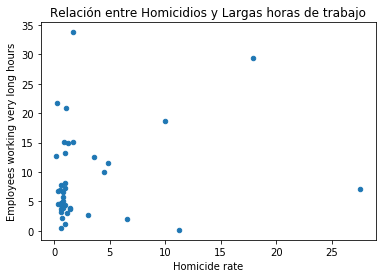

In [7]:
OCDE4.plot.scatter(x='Homicide rate', y='Employees working very long hours')
plt.title("Relación entre Homicidios y Largas horas de trabajo")

#### Decidí tomar esta correlación debido a que largas horas de trabajo aumentan el estrés y por tanto, aumentan la infelicidad en las personas lo que las lleva a tomar decisiones equivocadas, como quitarse la vida.

Text(0.5,1,'Correlación entre Habilidades de los estudiantes y Logros educativos')

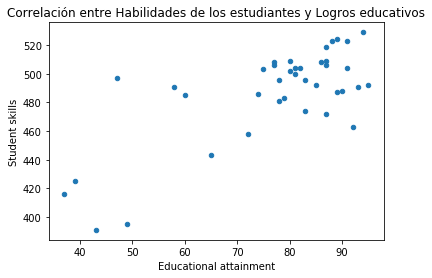

In [8]:
OCDE4.plot.scatter(x='Educational attainment', y='Student skills')
plt.title("Correlación entre Habilidades de los estudiantes y Logros educativos")

Text(0.5,1,'Correlación entre Expectativa de vida y Cuidado personal')

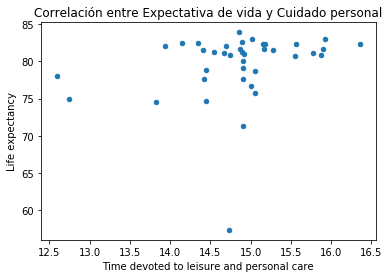

In [16]:
OCDE4.plot.scatter(x='Time devoted to leisure and personal care', y='Life expectancy')
plt.title("Correlación entre Expectativa de vida y Cuidado personal")

#### En este caso, pienso que existe una correlación entre los cuidados personales y la expectativa de vida, porque al poner mayor atención en tu cuidado, quiere decir que tienes mayor amor propio, por tanto aumenta tu expectativa de vida por estar atento de tus necesidades.